In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [2]:
veri=pd.read_excel("asenkron_motor_1.xlsx",names=['yuk_akimi','guc_faktoru','faktor_hatasi','akim_degisimi','uyarma_akimi'])
veri.head()

,yuk_akimi,guc_faktoru,faktor_hatasi,akim_degisimi,uyarma_akimi
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [3]:
veri.shape

(557, 5)

In [4]:
veri.isnull().sum()

yuk_akimi        0
guc_faktoru      0
faktor_hatasi    0
akim_degisimi    0
uyarma_akimi     0
dtype: int64

In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yuk_akimi      557 non-null    float64
 1   guc_faktoru    557 non-null    float64
 2   faktor_hatasi  557 non-null    float64
 3   akim_degisimi  557 non-null    float64
 4   uyarma_akimi   557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB


In [6]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
yuk_akimi,557.0,4.499820,0.896024,3.000,3.700,4.500,5.300,6.000
guc_faktoru,557.0,0.825296,0.103925,0.650,0.740,0.820,0.920,1.000
faktor_hatasi,557.0,0.174704,0.103925,0.000,0.080,0.180,0.260,0.350
akim_degisimi,557.0,0.350659,0.180566,0.037,0.189,0.345,0.486,0.769
uyarma_akimi,557.0,1.530659,0.180566,1.217,1.369,1.525,1.666,1.949


<AxesSubplot:>

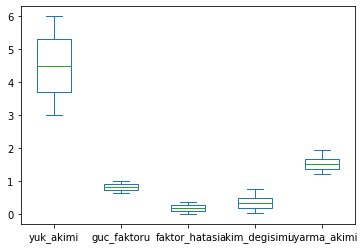

In [7]:
veri.plot.box()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=veri.drop('uyarma_akimi',axis=1)
y=veri['uyarma_akimi']
y=le.fit_transform(y)
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,10,1)}
scoring={'Accuracy':'accuracy'}
knn=GridSearchCV(model_knn,return_train_score=True,param_grid=param_grid,scoring=scoring,cv=5,refit='Accuracy')
knn.fit(x_egitim,y_egitim)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': 'accuracy'})

In [35]:
from sklearn.metrics import*
egitim_tahmin=knn.predict(x_egitim)
test_tahmin=knn.predict(x_test)
print("\nEGITIM ICIN KNN DOGRULUK ORANI: %.2f"%accuracy_score(y_egitim,egitim_tahmin))
print("\nTEST ICIN KNN DOGRULUK ORANI: %.2f"%accuracy_score(y_test,test_tahmin))


EGITIM ICIN KNN DOGRULUK ORANI: 1.00

TEST ICIN KNN DOGRULUK ORANI: 0.19


## 